### tags

In [1]:
import json
import os
import glob

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame

### 1. data 불러오기

In [2]:
df = pd.read_json('arena_data/orig/train.json', typ = 'frame')

In [3]:
df

,tags,id,plylst_title,songs,like_cnt,updt_date
0,"[힐링, 휴식, 밤, 새벽]",147668,To. 힘들고 지친 분들에게,"[663185, 649626, 6855, 188486, 348451, 169945,...",12,2016-06-23 10:06:27.000
1,[팝],50422,130807-7,"[627035, 256438, 603324, 200889, 441319, 21689...",0,2013-08-15 13:17:11.000
2,[뉴에이지],116432,숙면을 위한 슬픈 마음을 달래 줄 피아노,"[129204, 369497, 649743, 344619, 110281, 63266...",23,2015-09-03 16:51:50.000
3,"[하드락, 록스피릿, 댄스]",55076,당신을 하얗게 불태울 곡들,"[677591, 420396, 104934, 119279, 251988, 58850...",1,2017-01-09 15:41:25.000
4,"[힐링, 휴식, 기분전환]",125064,[스피커 필수 / HIPHOP] 듣고 있음 꿀렁꿀렁이고 싶은 힙합음악!,"[704455, 694036, 508043, 154933, 57614, 645195...",715,2016-02-22 12:32:50.000
...,...,...,...,...,...,...
92051,"[90년생, 회상, 추억, 좋은노래, 80년생, 옛날노래]",149690,옛날노래 * 좋은노래 8090년생 노래 모음,"[292099, 513963, 174225, 287212, 140444, 62469...",155,2020-01-15 15:15:45.000
92052,[팝],35004,LOVE 1,"[62596, 359718, 596004, 668790, 291212, 148977...",8,2010-03-23 00:03:00.000
92053,"[여행, 발라드, 기분전환, 사랑]",59765,추억의 2004년 발라드 베스트,"[214372, 145150, 407082, 160552, 102445, 50845...",3,2019-05-15 13:26:07.000
92054,"[소울, 알앤비]",9867,All Music Guide 선정 90s R&B: 1997,"[561958, 397574, 250915, 110345, 426772, 10698...",51,2013-12-24 14:40:01.000


In [4]:
df['songs'][2]

[129204,
 369497,
 649743,
 344619,
 110281,
 632662,
 32123,
 14636,
 545493,
 428001,
 406581,
 121077,
 589420,
 181312,
 40782]

### 2. 데이터 필터링(like_cnt<10 제거)
- like_cnt<10 제거 
- tags(len) 2 이하 제거

In [5]:
# data='like_cnt > = 10'
# #filter_df = df.query(data)
# for i in range(92056):
#     df[i]=df.loc['len_tag']=len(df['tags'][i])

In [6]:
tags=[]
for i in range(92055):
    tags.append(len(df['tags'][i]))
ddf=pd.DataFrame({'len_tags':tags})
ddf
#     pd=pd.DataFrame({'tags':[i.append(len(df['tags'][i]))]})

,len_tags
0,4
1,1
2,1
3,3
4,3
...,...
92050,4
92051,6
92052,1
92053,4


In [7]:
m=pd.concat([df, ddf], axis=1)
m

,tags,id,plylst_title,songs,like_cnt,updt_date,len_tags
0,"[힐링, 휴식, 밤, 새벽]",147668,To. 힘들고 지친 분들에게,"[663185, 649626, 6855, 188486, 348451, 169945,...",12,2016-06-23 10:06:27.000,4.0
1,[팝],50422,130807-7,"[627035, 256438, 603324, 200889, 441319, 21689...",0,2013-08-15 13:17:11.000,1.0
2,[뉴에이지],116432,숙면을 위한 슬픈 마음을 달래 줄 피아노,"[129204, 369497, 649743, 344619, 110281, 63266...",23,2015-09-03 16:51:50.000,1.0
3,"[하드락, 록스피릿, 댄스]",55076,당신을 하얗게 불태울 곡들,"[677591, 420396, 104934, 119279, 251988, 58850...",1,2017-01-09 15:41:25.000,3.0
4,"[힐링, 휴식, 기분전환]",125064,[스피커 필수 / HIPHOP] 듣고 있음 꿀렁꿀렁이고 싶은 힙합음악!,"[704455, 694036, 508043, 154933, 57614, 645195...",715,2016-02-22 12:32:50.000,3.0
...,...,...,...,...,...,...,...
92051,"[90년생, 회상, 추억, 좋은노래, 80년생, 옛날노래]",149690,옛날노래 * 좋은노래 8090년생 노래 모음,"[292099, 513963, 174225, 287212, 140444, 62469...",155,2020-01-15 15:15:45.000,6.0
92052,[팝],35004,LOVE 1,"[62596, 359718, 596004, 668790, 291212, 148977...",8,2010-03-23 00:03:00.000,1.0
92053,"[여행, 발라드, 기분전환, 사랑]",59765,추억의 2004년 발라드 베스트,"[214372, 145150, 407082, 160552, 102445, 50845...",3,2019-05-15 13:26:07.000,4.0
92054,"[소울, 알앤비]",9867,All Music Guide 선정 90s R&B: 1997,"[561958, 397574, 250915, 110345, 426772, 10698...",51,2013-12-24 14:40:01.000,2.0


In [8]:
data='like_cnt > = 5'
filter_df = m.query(data)

In [9]:
data1='len_tags>2.0'
filtered_df=filter_df.query(data1)
filtered_df
len(filtered_df)

35813

In [10]:
list=filtered_df[['songs']]
list.to_csv('./filtered_songs_data.txt',sep=',',index=False, header=False)
f=open('./filtered_songs_data.txt','r',encoding='UTF-8')
lines=f.readlines()
f.close()

In [11]:
lines

['"[663185, 649626, 6855, 188486, 348451, 169945, 512599, 532114, 454528, 418935, 124485, 517372, 549950, 540588, 500931, 233641, 331055, 490266, 268515, 531820, 413762, 422713, 215080, 413189, 577903, 352228, 630395, 539109, 152475, 111865, 7460, 72432, 572480, 348092, 324208, 186039, 376140, 270269, 622615, 35001, 444706, 491303, 408698, 325979, 25538, 549392, 473514, 666814, 118223, 697100, 333034, 359279, 421124, 403253, 27784, 118049, 339124, 175073, 522895, 6925, 615815, 672550, 379112, 80972, 227036, 112153]"\n',
 '"[704455, 694036, 508043, 154933, 57614, 645195, 590082, 408239, 590833, 435729, 601872, 358275, 359791, 142982, 598654, 162545, 303461, 420191, 210153, 227812, 465555, 97519, 534976, 455660, 203189, 211121, 153119, 454825, 138201, 263415, 215966, 420571, 20000, 135237, 620025]"\n',
 '"[437564, 485507, 514180, 388107, 1723, 142323, 366356, 609650, 131244, 167014, 91295]"\n',
 '"[34074, 445290, 387859, 545301, 672105, 695032, 622775, 304532, 113958, 528414, 336577, 447

### 3. 데이터 전처리

In [12]:
# import re
# def remove_between_square_brackets(text):
#     pattern=r'[^a-zA-z0-9가-힣\s]'
#     text=re.sub(pattern,'',text)
#     return text
import re
def remove_between_square_brackets(text):
    pattern='[^a-zA-z0-9가-힣,]'
    text=re.sub(pattern,'',text)
    #print(text)
    text = re.sub('[-=#/?:$\[\]}]', '', text)
    #print(text)
    str_list = text.split(',')
    return str_list

list=[]
for i in range(len(lines)):
    list.append(remove_between_square_brackets(lines[i]))
list

[['663185',
  '649626',
  '6855',
  '188486',
  '348451',
  '169945',
  '512599',
  '532114',
  '454528',
  '418935',
  '124485',
  '517372',
  '549950',
  '540588',
  '500931',
  '233641',
  '331055',
  '490266',
  '268515',
  '531820',
  '413762',
  '422713',
  '215080',
  '413189',
  '577903',
  '352228',
  '630395',
  '539109',
  '152475',
  '111865',
  '7460',
  '72432',
  '572480',
  '348092',
  '324208',
  '186039',
  '376140',
  '270269',
  '622615',
  '35001',
  '444706',
  '491303',
  '408698',
  '325979',
  '25538',
  '549392',
  '473514',
  '666814',
  '118223',
  '697100',
  '333034',
  '359279',
  '421124',
  '403253',
  '27784',
  '118049',
  '339124',
  '175073',
  '522895',
  '6925',
  '615815',
  '672550',
  '379112',
  '80972',
  '227036',
  '112153'],
 ['704455',
  '694036',
  '508043',
  '154933',
  '57614',
  '645195',
  '590082',
  '408239',
  '590833',
  '435729',
  '601872',
  '358275',
  '359791',
  '142982',
  '598654',
  '162545',
  '303461',
  '420191',
  '

In [13]:
import pickle
f = open('./filter_songs_list.dat', 'wb')
pickle.dump(list, f)
#list = f.readlines()
f.close()

In [14]:
import pickle
f = open('./filter_songs_list.dat', 'rb')
d = pickle.load(f)
print(d[0:10])

[['663185', '649626', '6855', '188486', '348451', '169945', '512599', '532114', '454528', '418935', '124485', '517372', '549950', '540588', '500931', '233641', '331055', '490266', '268515', '531820', '413762', '422713', '215080', '413189', '577903', '352228', '630395', '539109', '152475', '111865', '7460', '72432', '572480', '348092', '324208', '186039', '376140', '270269', '622615', '35001', '444706', '491303', '408698', '325979', '25538', '549392', '473514', '666814', '118223', '697100', '333034', '359279', '421124', '403253', '27784', '118049', '339124', '175073', '522895', '6925', '615815', '672550', '379112', '80972', '227036', '112153'], ['704455', '694036', '508043', '154933', '57614', '645195', '590082', '408239', '590833', '435729', '601872', '358275', '359791', '142982', '598654', '162545', '303461', '420191', '210153', '227812', '465555', '97519', '534976', '455660', '203189', '211121', '153119', '454825', '138201', '263415', '215966', '420571', '20000', '135237', '620025'],

In [15]:
#!--NotebookApp.iopub_data_rate_limit

### 4. 학습

In [16]:
#!pip install -U gensim
from gensim.models.word2vec import Word2Vec

In [17]:
#2차원, 3차원일 때 정확도 비교 요망
#model -> embedding하는 애
model = Word2Vec(#list, 
                size=256, #차원수
                 sg=0, #CBOW 사용, 1이면 skip-gram 
                 negative=20,
                 window=10, 
                 min_count=1
                )
#model.init_sims(replace=True)
model.build_vocab(list)

In [19]:
#model.most_similar('370796', topn=10)
##태그들 embedding 해준 모델
print(model)
#model.most_similar('370796', topn=10)

Word2Vec(vocab=341729, size=256, alpha=0.025)


C:\Users\woojung\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.


[('124512', 0.31608572602272034),
 ('467164', 0.2857830822467804),
 ('336738', 0.27561843395233154),
 ('479746', 0.26325687766075134),
 ('446910', 0.2603722810745239),
 ('79572', 0.25845521688461304),
 ('696392', 0.25571906566619873),
 ('259239', 0.25517886877059937),
 ('524982', 0.2547353208065033),
 ('621299', 0.2506718337535858)]

In [23]:
import pickle
f = open('./song2vec_model_sg2_win10.dat', 'wb')
pickle.dump(model,f)
#list = f.readlines()
f.close()
# f = open('./song2vec_model_sg2_win10.dat', 'rb')
# model = pickle.load()

In [21]:
import logging
from time import time
from gensim.models.callbacks import CallbackAny2Vec

logging.basicConfig(format="%(asctime)s : %(levelname)s : %(message)s", level=logging.INFO)

class Callback(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 1
        self.training_loss = []

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 1:
            current_loss = loss
        else:
            current_loss = loss - self.loss_previous_step
        print(f"Loss after epoch {self.epoch}: {current_loss}")
        self.training_loss.append(current_loss)
        self.epoch += 1
        self.loss_previous_step = loss

In [22]:
logging.disable(logging.INFO) # disable logging
callback = Callback() # instead, print out loss for each epoch
t = time()

model.train(list,
            total_examples = model.corpus_count,
            epochs = 100,
            compute_loss = True,
            callbacks = [callback]) 

Loss after epoch 1: 6107414.5
Loss after epoch 2: 2278523.5
Loss after epoch 3: 1431971.0
Loss after epoch 4: 1252937.0
Loss after epoch 5: 1146048.0
Loss after epoch 6: 1066984.0
Loss after epoch 7: 1015706.0
Loss after epoch 8: 958828.0
Loss after epoch 9: 907736.0
Loss after epoch 10: 821368.0
Loss after epoch 11: 714876.0
Loss after epoch 12: 686942.0
Loss after epoch 13: 650126.0
Loss after epoch 14: 628702.0
Loss after epoch 15: 609246.0
Loss after epoch 16: 594940.0
Loss after epoch 17: 560278.0
Loss after epoch 18: 558086.0
Loss after epoch 19: 539422.0
Loss after epoch 20: 518994.0
Loss after epoch 21: 501826.0
Loss after epoch 22: 490124.0
Loss after epoch 23: 474546.0
Loss after epoch 24: 460124.0
Loss after epoch 25: 460552.0
Loss after epoch 26: 443164.0
Loss after epoch 27: 423108.0
Loss after epoch 28: 409624.0
Loss after epoch 29: 402894.0
Loss after epoch 30: 401854.0
Loss after epoch 31: 380668.0
Loss after epoch 32: 376070.0
Loss after epoch 33: 363354.0
Loss after e

(190653700, 190653700)

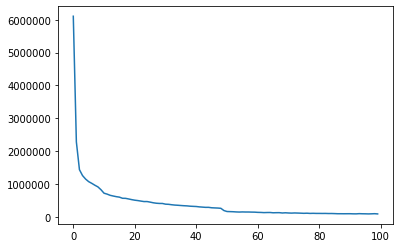

In [24]:
plt.plot(callback.training_loss)

In [49]:
print(callback.training_loss)

graph=[]

#for i in range(100):
#    graph.append([callback.training_loss.index, callback.training_loss.values])
#graph=[callback.training_loss.index,callback.training_loss.values]

[6107414.5, 2278523.5, 1431971.0, 1252937.0, 1146048.0, 1066984.0, 1015706.0, 958828.0, 907736.0, 821368.0, 714876.0, 686942.0, 650126.0, 628702.0, 609246.0, 594940.0, 560278.0, 558086.0, 539422.0, 518994.0, 501826.0, 490124.0, 474546.0, 460124.0, 460552.0, 443164.0, 423108.0, 409624.0, 402894.0, 401854.0, 380668.0, 376070.0, 363354.0, 353054.0, 347356.0, 339688.0, 333186.0, 328398.0, 318812.0, 313760.0, 309282.0, 298066.0, 291006.0, 283802.0, 284198.0, 271078.0, 266524.0, 262292.0, 254330.0, 185944.0, 156776.0, 153600.0, 150308.0, 143964.0, 140456.0, 144092.0, 141692.0, 141600.0, 138836.0, 137244.0, 131048.0, 128824.0, 123320.0, 126160.0, 127284.0, 118160.0, 121112.0, 121904.0, 111852.0, 118040.0, 111804.0, 108232.0, 112692.0, 109632.0, 106020.0, 101744.0, 105392.0, 99192.0, 101852.0, 98920.0, 98884.0, 97680.0, 98600.0, 95504.0, 96084.0, 93296.0, 89124.0, 89348.0, 88744.0, 89188.0, 89812.0, 86320.0, 85220.0, 91416.0, 88228.0, 86640.0, 83788.0, 86644.0, 90440.0, 83616.0]


In [30]:
import math
def distance(x1, y1, x2, y2):
    result = math.sqrt( math.pow(x1 - x2, 2) + math.pow(y1 - y2, 2))
    return result

In [31]:
def shortest_distance(x1, y1, a, b, c):    
    d = abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b)) 
    print("Perpendicular distance is", d)

In [42]:
songs_cluster = songs.copy()
songs_cluster.loc[model.wv.vocab.keys(), 'cluster'] = skm_opt.labels_
songs_cluster['cluster'] = songs_cluster['cluster'].fillna(-1).astype('int').astype('category')
songs_cluster.head()

NameError: name 'songs' is not defined

In [27]:
model.most_similar('370796', topn=20)

C:\Users\woojung\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('184658', 0.6147958636283875),
 ('160286', 0.5876710414886475),
 ('85040', 0.5788998007774353),
 ('158308', 0.5784043669700623),
 ('180049', 0.5612454414367676),
 ('677187', 0.5584655404090881),
 ('437622', 0.5525323152542114),
 ('394769', 0.5466836094856262),
 ('245307', 0.5438112020492554),
 ('671005', 0.5424190759658813),
 ('646858', 0.5414540767669678),
 ('361789', 0.5343711972236633),
 ('469871', 0.5337221622467041),
 ('650260', 0.5310511589050293),
 ('222515', 0.5299297571182251),
 ('268407', 0.5279828906059265),
 ('226218', 0.524441123008728),
 ('269603', 0.5231808423995972),
 ('640618', 0.5211765766143799),
 ('337208', 0.5186265707015991)]

In [28]:
import pickle
import pickle
f = open('./song2vec_filtered_model_train_epoch_100.dat', 'wb')
pickle.dump(model,f)
#list = f.readlines()
f.close()

In [19]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt

# def tsne_plot(model):
#     labels = []
#     tokens = []

#     for word in model.wv.vocab:
#         tokens.append(model[word])
#         labels.append(word)
    
#     tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
#     new_values = tsne_model.fit_transform(tokens)

#     x = []
#     y = []
#     for value in new_values:
#         x.append(value[0])
#         y.append(value[1])
        
#     plt.figure(figsize=(16, 16)) 
#     for i in range(len(x)):
#         plt.scatter(x[i],y[i])
#         plt.annotate(labels[i],
#                      xy=(x[i], y[i]),
#                      xytext=(5, 2),
#                      textcoords='offset points',
#                      ha='right',
#                      va='bottom')
#     plt.show()

In [20]:
#tsne_plot(model)

### KMeans

In [ ]:
#내가 선택한 태그 -> 태그마다 query 사용해서 유사도 나열 
#-> 거리 가까운 topn -> (좋아요 축, 업데이트 날짜 수 추가)
filter_df.query('model.most_similar("이별", topn=10)')

In [ ]:
from sklearn.cluster import KMeans

word_vectors = model.wv.syn0 # 어휘의 feature vector
num_clusters = int(word_vectors.shape[0]/50) # 어휘 크기의 1/5나 평균 5단어
print(num_clusters)
num_clusters = int(num_clusters)

In [ ]:
kmeans_clustering = KMeans(n_clusters=num_clusters)
idx = kmeans_clustering.fit_predict(word_vectors)

idx = list(idx)
names = model.wv.index2word
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}

In [ ]:
for c in range(num_clusters):
    # 클러스터 번호를 출력
    print("\ncluster {}".format(c))
    
    words = []
    cluster_values = list(word_centroid_map.values())
    for i in range(len(cluster_values)):
        if (cluster_values[i] == c):
            words.append(list(word_centroid_map.keys())[i])            
    print(words)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

#cosine_similarity(list[0], list[1])

### train dataset 생성

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
##Word2Vec중 skipgram 쓸때 + Negative Sampling을 위한 data set도 만들어주기
def create_skipgram_dataset(text):
    data=[]
    for i in range(len(text)):
        for j in range(len(text[i])):
            for k in range(len(text[i])):
                if j != k:
                    data.append((text[i][j],text[i][k],1))
    return data
            
skipgram_train =create_skipgram_dataset(list)
skipgram_train   

In [ ]:
import pickle

f = open('./skip_list.dat', 'wb')
pickle.dump(skipgram_train, f)
#list = f.readlines()
f.close()

In [ ]:
import pickle
f = open('./skip_list.dat', 'rb')
d = pickle.load(f)
print(d)